Neste arquivo iremos testar diferentes algoritmos de clusterização para obter diferentes resultados no agrupamentos dos fundos imobiliários a fim de encontrar um que se destaque dos demais

In [39]:
# importando as bibliotecas para a análise
import pandas as pd
import numpy as np
from time import sleep

# Algoritmos de Clusterização
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [17]:
# Lendo um arquivo
dt = pd.read_csv("planilhas_fundamentus_fii/teste_31_07_2023.csv")

# Modificando uma configuração do pandas para melhorar a visualização de valores muito grandes
pd.set_option("display.float_format", "{:.4f}".format)

In [18]:
# Visualizando os dados
dt

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media
0,AAZQ11,Títulos e Val Mob,9.3800,0.0462,0.0880,0.9700,225470000.0000,942155.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,ABCP11,Shoppings,71.9000,0.1714,0.0764,0.7800,338583000.0000,61067.0000,1.0000,4426.6000,1068.0000,0.2413,0.0390
2,AEFI11,Outros,174.9000,0.0803,0.0000,1.2100,411893000.0000,0.0000,7.0000,4272.2100,347.1700,0.0813,0.0000
3,AFCR11,Desconhecido,103.1500,0.1821,0.0000,0.9900,186437000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,AFHI11,Títulos e Val Mob,96.1500,0.1110,0.1367,1.0000,290320000.0000,1052980.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,XTED11,Lajes Corporativas,8.8200,-0.0045,0.0000,0.6200,44228400.0000,0.0000,1.0000,2647.6300,0.0000,0.0000,0.0000
414,YCHY11,Híbrido,1000.0000,0.0125,0.0000,9.9800,3708170000.0000,0.0000,10.0000,8157.5000,65.7400,0.0081,0.0000
415,YUFI11,Residencial,80.0100,0.0395,0.0484,0.7900,39416900.0000,927.0000,28.0000,8707.2800,882.4400,0.1013,0.0000
416,ZAVI11,Híbrido,127.4500,0.0575,0.0753,0.9300,118085000.0000,164849.0000,8.0000,2920.4800,163.1200,0.0559,0.0110


In [19]:
# Criando uma copia para trabalhar
dt_test = dt.copy()

In [20]:
# Definindo as colunas do tipo numérica
numeric = dt_test.drop(["papel", "segmento"], axis=1)

In [21]:
# Normalizando os valores numéricos

scaler = StandardScaler()
numeric = scaler.fit_transform(numeric)

# KMEANS
O resultado esperado não foi satisfatório, o que buscamos com a clusterização é:
- Membros de um mesmo grupo similares entre si
- Grupos pouco similares, ou seja, o mais distintos entre si.

<AxesSubplot:>

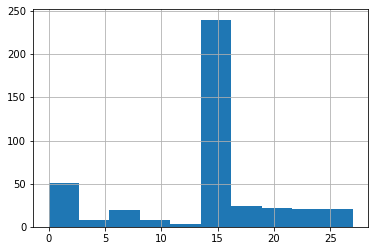

In [22]:
# Criando o objeto kmean com 28 grupos
km = KMeans(n_clusters=28, init="k-means++", random_state=0)

# executando o algoritmo
km.fit(numeric)

# Adicionando uma coluna com a etiqueta de cluster que cada um pertence
dt_test["cluster_label"] = km.labels_

# Plotando um histograma baseado nos grupos para vê a distribuição
dt_test.cluster_label.hist()

## Testando tamanhos distintos
No código a seguir é feito um algoritmo para testar tamanhos diferentes de grupos, basicamente o que se busca é uma quantidade de grupos de indíviduos com características similares entre si.
Uma característica relevante no quesito, bom fundo imobiliário é o dividend_yield, basicamente um indicador de rentabilidade de uma ação que representa o quanto de uma fundo imobiliário paga pelo preço do fundo.
Assim, vamos considerar que a quantidade ideal de grupos irá conseguir agrupar fundos que possuam um dividend_yield similar.
Tomando o dividend_yield bom como um valor maior que 0.12
Teremos que o algoritmo irá formar: k-grupos com o dividend_yield > 0.12, em que quanto menor a quantidade de grupos melhor.

In [23]:
# Testando para 19 grupos diferentes
for i in range(2, 20):
    km = KMeans(n_clusters=i, init="k-means++", random_state=0)

    km.fit(numeric)

    dt_test["cluster_label"] = km.labels_

    # dt_km.cluster_label.hist()

    print("-*-" * 15)
    print(f"Para a quantidade de grupos de {i}")
    print("grupos que se adequam a regra:")
    print(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique())
    print("grupos que se adequam na propriedade de > 0.12:")
    print(len(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique()))
    print("")

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 2
grupos que se adequam a regra:
[0 1]
grupos que se adequam na propriedade de > 0.12:
2

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 3
grupos que se adequam a regra:
[0 1]
grupos que se adequam na propriedade de > 0.12:
2

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 4
grupos que se adequam a regra:
[0 1]
grupos que se adequam na propriedade de > 0.12:
2

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 5
grupos que se adequam a regra:
[0 4 1]
grupos que se adequam na propriedade de > 0.12:
3

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 6
grupos que se adequam a regra:
[1 0 5 2]
grupos que se adequam na propriedade de > 0.12:
4

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 7
grupos que se adequam a regra:
[1 0 4 3]
grupos que se adequam na propriedade de

A quantidade de grupos que se adequam na regra se mantém para uma quantiade de grupos 6, 7, 8 e 9. Vamos verificar se para 9 grupos há uma separação adequada

<AxesSubplot:>

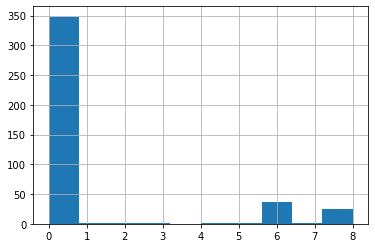

In [24]:
# Criando o objeto kmean com 28 grupos
km = KMeans(n_clusters=9, init="k-means++", random_state=0)

# executando o algoritmo
km.fit(numeric)

# Adicionando uma coluna com a etiqueta de cluster que cada um pertence
dt_test["cluster_label"] = km.labels_

# Plotando um histograma baseado nos grupos para vê a distribuição
dt_test.cluster_label.hist()

Muitos pontos de dados foram agrupados no primeiro grupo, não havendo uma boa distribuição, logo. Dificilmente houve uma boa clusterização de pontos

# MiniBatchMeans

O funcionamento desse método é extremamente similar ao kmeans, a única mudança é que ele não utiliza de todos os pontos, mas de uma quantidade reduzida para o funcionamento do algoritmo.
É esperado que o problema não seja resolvido, uma vez que utiliza da mesma lógica do k-means, mas para fins didáticos, iremos utilizá-lo.

In [30]:
for i in range(2, 20):
    kmm = MiniBatchKMeans(
        n_clusters=i, init="k-means++", random_state=0, batch_size=3073
    )

    kmm.fit(numeric)

    dt_test["cluster_label"] = kmm.labels_

    # dt_km.cluster_label.hist()

    print("-*-" * 15)
    print(f"Para a quantidade de grupos de {i}")
    print("grupos que se adequam a regra:")
    print(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique())
    print("grupos que se adequam na propriedade de > 0.12:")
    print(len(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique()))
    print("")

c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 2
grupos que se adequam a regra:
[1 0]
grupos que se adequam na propriedade de > 0.12:
2

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 3
grupos que se adequam a regra:
[2 0 1]
grupos que se adequam na propriedade de > 0.12:
3



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 4
grupos que se adequam a regra:
[3 2 0 1]
grupos que se adequam na propriedade de > 0.12:
4

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 5
grupos que se adequam a regra:
[4 1 0 3]
grupos que se adequam na propriedade de > 0.12:
4



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 6
grupos que se adequam a regra:
[2 3 5 4 1 0]
grupos que se adequam na propriedade de > 0.12:
6

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 7
grupos que se adequam a regra:
[5 3 1 2 0]
grupos que se adequam na propriedade de > 0.12:
5



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 8
grupos que se adequam a regra:
[1 4 5 0 3 7 6]
grupos que se adequam na propriedade de > 0.12:
7

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 9
grupos que se adequam a regra:
[4 6 8 3 7 1 0]
grupos que se adequam na propriedade de > 0.12:
7



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 10
grupos que se adequam a regra:
[2 3 4 7 5 8 0 6]
grupos que se adequam na propriedade de > 0.12:
8

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 11
grupos que se adequam a regra:
[ 9  8  4  2 10  7  0  3  6]
grupos que se adequam na propriedade de > 0.12:
9



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 12
grupos que se adequam a regra:
[ 1  4  6  7  0  2 10 11  8]
grupos que se adequam na propriedade de > 0.12:
9

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 13
grupos que se adequam a regra:
[ 8  6  5  4 12  2  1  7  9  3  0]
grupos que se adequam na propriedade de > 0.12:
11



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 14
grupos que se adequam a regra:
[12  5  2  8  3 11  7  1  9  6 13]
grupos que se adequam na propriedade de > 0.12:
11

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 15
grupos que se adequam a regra:
[11  8  7  2  6 10  4  5  9  1 13]
grupos que se adequam na propriedade de > 0.12:
11



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 16
grupos que se adequam a regra:
[ 9 10  5 11  2 12  3  0  6  8  1 15]
grupos que se adequam na propriedade de > 0.12:
12

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 17
grupos que se adequam a regra:
[14 11 12  8 10  4 16  5  9  1 13]
grupos que se adequam na propriedade de > 0.12:
11



c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 18
grupos que se adequam a regra:
[ 1 17 16  5  4 12  9  8 10 13]
grupos que se adequam na propriedade de > 0.12:
10

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Para a quantidade de grupos de 19
grupos que se adequam a regra:
[17 12 16  5  6 11 15 14 18  4  9  1  8 10 13]
grupos que se adequam na propriedade de > 0.12:
15



O caso interessante desse método foi quando houve 18 grupos em que o número de grupos que atendem o critério, apresentado anteriormente para o knn, diminuiu, ou seja, ele conseguiu agrupar melhor os fundos que são parecidos.

c:\Users\AnD_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


<AxesSubplot:>

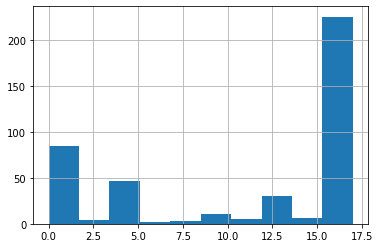

In [34]:
kmm = MiniBatchKMeans(n_clusters=18, init="k-means++", random_state=0, batch_size=3073)

kmm.fit(numeric)

dt_test["cluster_label"] = kmm.labels_

dt_test.cluster_label.hist()

In [37]:
print("grupos que se adequam a regra:")
print(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique())
print("grupos que se adequam na propriedade de > 0.12:")
print(len(dt_test.cluster_label[(dt_test.dividend_yield > 0.12)].unique()))
print("")

grupos que se adequam a regra:
[ 1 17 16  5  4 12  9  8 10 13]
grupos que se adequam na propriedade de > 0.12:
10



Muitos pontos de dados se adequaram a regra, se formos analisar os pontos veremos que ele ponderou entre as características, não agrupando corretamente pontos similares

In [38]:
dt_test[dt_test.cluster_label == 17]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
1,ABCP11,Shoppings,71.9000,0.1714,0.0764,0.7800,338583000.0000,61067.0000,1.0000,4426.6000,1068.0000,0.2413,0.0390,17
3,AFCR11,Desconhecido,103.1500,0.1821,0.0000,0.9900,186437000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
5,AFOF11,Títulos e Val Mob,91.6000,0.1072,0.0226,0.9900,63313200.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
7,AGRX11,Híbrido,10.9300,0.0570,0.1323,1.0800,104504000.0000,305477.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
10,ALZM11,Títulos e Val Mob,93.6000,0.1049,0.1050,1.0100,64695600.0000,76937.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,VVCR11,Títulos e Val Mob,22.1300,0.5161,0.0473,0.9700,23857100.0000,78981.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
398,VVRI11,Híbrido,98.8000,0.0141,0.0442,1.0300,39520000.0000,5837.0000,1.0000,4583.7800,38.2500,0.0083,0.0000,17
402,WSEC11,Títulos e Val Mob,87.0900,0.0573,0.1146,0.8700,21393700.0000,6498.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17
413,XTED11,Lajes Corporativas,8.8200,-0.0045,0.0000,0.6200,44228400.0000,0.0000,1.0000,2647.6300,0.0000,0.0000,0.0000,17


# DBSCAN
O DBSCAN (Density-based spatial clustering of applications with noise) é um método não-supervisionado que clusteriza amostras principais (área com alta densidade de dados) e identifica amostras que não são principais (área com baixa densidade de dados)

Para a regra definida, este método conseguiu apresentar um agrupamento mais próximo do esperado.

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

<AxesSubplot:>

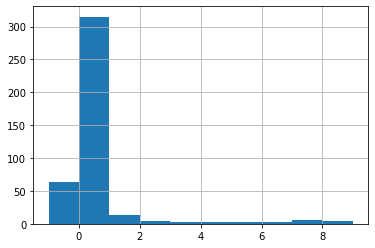

In [42]:
db = DBSCAN(eps=0.30, min_samples=2)
db.fit(numeric)

dt_test["cluster_label"] = db.labels_

dt_test.cluster_label.hist()

Em uma visão preliminar, aparenta não está como esperado, porém, ao analisar os cluster com o critério detemrinado de dividend_yield >= 0.12

In [46]:
dt_test.cluster_label[
    dt_test.dividend_yield >= 0.12
].unique()  # o grupo -1 seria um ponto de ruido

array([ 0, -1,  4,  7,  9], dtype=int64)

Por mais que tenhamos pontos de ruidos, o método apresenta poucos grupos que atendem o critério, o que se mostra um ponto curioso, analisando os grupos, observamos:

In [55]:
# Grupo 9
dt_test[dt_test.cluster_label == 9]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
381,VGIA11,Títulos e Val Mob,9.4400,0.1140,0.1826,0.9900,816136000.0000,4804350.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9
383,VGIR11,Títulos e Val Mob,9.5800,0.1207,0.1545,0.9900,988854000.0000,4506130.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9


In [56]:
# Grupo 8
dt_test[dt_test.cluster_label == 8]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
173,HSML11,Shoppings,94.5000,0.0937,0.0848,0.9900,1491270000.0000,2992050.0000,7.0000,9982.5500,781.9600,0.0783,0.0528,8
198,JSRE11,Híbrido,80.0600,0.0711,0.0686,0.7100,1662630000.0000,2895560.0000,6.0000,14079.3000,1181.8000,0.0839,0.0821,8


In [57]:
# Grupo 7
dt_test[dt_test.cluster_label == 7]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
156,HGCR11,Títulos e Val Mob,105.5100,0.1218,0.1266,1.0200,1626760000.0000,4227360.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7
211,KNSC11,Títulos e Val Mob,88.9200,0.1037,0.1065,0.9700,1180480000.0000,3904940.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7
228,MCCI11,Títulos e Val Mob,92.5600,0.0940,0.1342,0.9600,1569820000.0000,4318820.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7
279,PVBI11,Lajes Corporativas,102.7800,0.0250,0.0659,1.0100,1247980000.0000,4390670.0000,4.0000,18892.2000,1333.4300,0.0706,0.0035,7
303,RBRR11,Títulos e Val Mob,91.7700,0.0829,0.1223,0.9500,1233290000.0000,4001750.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7
361,TGAR11,Híbrido,122.8600,0.0893,0.1390,1.0300,1693560000.0000,4326020.0000,4.0000,79.2500,1.9400,0.0244,0.0000,7


In [59]:
# Grupo 6
dt_test[dt_test.cluster_label == 6]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
141,GTWR11,Lajes Corporativas,83.9900,0.1112,0.1031,0.8800,1007880000.0000,1086580.0000,3.0000,11168.3000,1331.5300,0.1192,0.0000,6
172,HSLG11,Logística,96.0000,0.0771,0.0839,0.9200,1215370000.0000,946698.0000,5.0000,2760.6900,239.4600,0.0867,0.0000,6


In [60]:
# Grupo 5
dt_test[dt_test.cluster_label == 5]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
78,CXAG11,Outros,88.0200,0.1004,0.0988,0.7600,184016000.0000,114547.0000,32.0000,3202.0700,356.0400,0.1112,0.0000,5
106,FATN11,Híbrido,96.9800,0.0950,0.1069,0.9800,123038000.0000,177504.0000,29.0000,25114.8000,2030.8000,0.0809,0.0000,5
415,YUFI11,Residencial,80.0100,0.0395,0.0484,0.7900,39416900.0000,927.0000,28.0000,8707.2800,882.4400,0.1013,0.0000,5


In [61]:
# Grupo 4
dt_test[dt_test.cluster_label == 4]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
77,CVBI11,Títulos e Val Mob,92.1900,0.1346,0.1265,0.9600,1015030000.0000,2938150.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
151,HCTR11,Títulos e Val Mob,55.8000,0.1400,0.1978,0.5000,1232300000.0000,3155170.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
298,RBRF11,Títulos e Val Mob,84.0100,0.0856,0.0919,0.9700,1149320000.0000,2966840.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4


Por mais que alguns elementos de um grupo tenham características diferentes, as demais são muito similares. E, como a quantidade de grupos foi baixa(9 grupos), podemos observar que o método DBSCAN conseguiu agrupar os dados de interesse!

O próximo passo é busca um elemento dentro de um grupo.

**ATENÇÃO:** não estamos buscando um ponto anormal que será o "melhor investimento do período", mas um fundo imobiliário bom, que tenho características previsíveis, o processo de clusterização permite agrupar os fundos de acordo com suas características, assim, um fundo com as características desejadas estará agrupado com outros fundos com as mesmas características. Se você busca um ponto anormal, é necessário realizar uma análise geral baseada em conhecimentos e experiências do mercado financeiro que consiga identificar de qual ponto este se trata.
 

Abaixo temos uma análise mais densa em que unimos não só uma, mas diversas características consideradas relevantes para se ter um bom fundo. Observe que muitos estão caracterízados como ruído ou no grupo 0, mas um dos fundos está em um grupo que o cluster apresentou

In [64]:
dt_test[
    (dt_test.dividend_yield > 0.12)
    & (dt_test.p_sobre_vp <= 1)
    & (dt_test.liquidez > 10000)
    & (dt_test.cotacao <= 120)
    & (dt_test.ffo_yield > dt_test.dividend_yield)
]

,papel,segmento,cotacao,ffo_yield,dividend_yield,p_sobre_vp,valor_de_mercado,liquidez,qtd_de_imoveis,preco_do_m2,aluguel_por_m2,cap_rate,vacancia_media,cluster_label
13,APTO11,Híbrido,9.9500,0.1304,0.1270,0.9400,39927900.0000,46991.0000,5.0000,16914.3000,1102.4100,0.0652,0.0000,0
28,BCRI11,Títulos e Val Mob,76.3100,0.1782,0.1423,0.7700,477538000.0000,664051.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
77,CVBI11,Títulos e Val Mob,92.1900,0.1346,0.1265,0.9600,1015030000.0000,2938150.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4
117,FLCR11,Títulos e Val Mob,93.4800,0.1526,0.1453,0.9400,59229300.0000,162177.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
170,HREC11,Títulos e Val Mob,84.0000,0.1331,0.1207,0.9000,433168000.0000,121462.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
188,ITIP11,Títulos e Val Mob,77.4000,0.2097,0.1213,0.9900,57906900.0000,98660.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
209,KNRE11,Residencial,0.5600,0.6244,0.4578,0.7400,10386400.0000,12865.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
234,MGCR11,Títulos e Val Mob,9.2600,1.0645,0.1416,0.1000,13170500.0000,284760.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
261,OURE11,Híbrido,84.3000,0.1581,0.1462,0.9200,90798400.0000,135335.0000,7.0000,2385.8600,167.4800,0.0702,0.0000,0
267,PLCR11,Títulos e Val Mob,89.1600,0.2125,0.1303,0.9600,188054000.0000,508670.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


# Conclusão

Com o auxilio dos algoritmos de clusterização, em especial o algoritmo de DBSCAN que conseguiu agrupar os fundos, foi possível sair de uma quantidade alta de fundos que demandaria muito tempo para serem analisados para poucos fundos dentro de um grupo com as características de interesse do usuário, poupando bastante tempo para que o usuário estude os fundos e consiga escolher em qual deve investir.
Um resulto interessante do projeto foi que, ao testar uma série de características observamos que um fundo imobilário apresentou todas as características e que, consequentemente, o grupo a que ele pertence, merece atenção em futuras análises.